In [1]:
import getdist

In [2]:
from getdist.mcsamples import loadMCSamples

In [3]:
samples = loadMCSamples('/scratch/users/delon/chains/try3-DESI-Y1-vary-mnu')

In [4]:
from getdist import plots, MCSamples

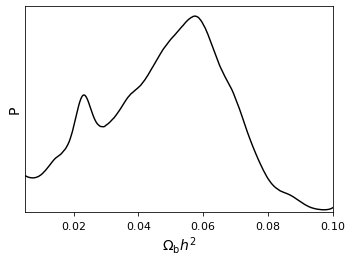

In [5]:
%matplotlib inline
g = plots.get_single_plotter(width_inch=5)
g.plot_1d(samples, 'ombh2', normalized=True, 
)

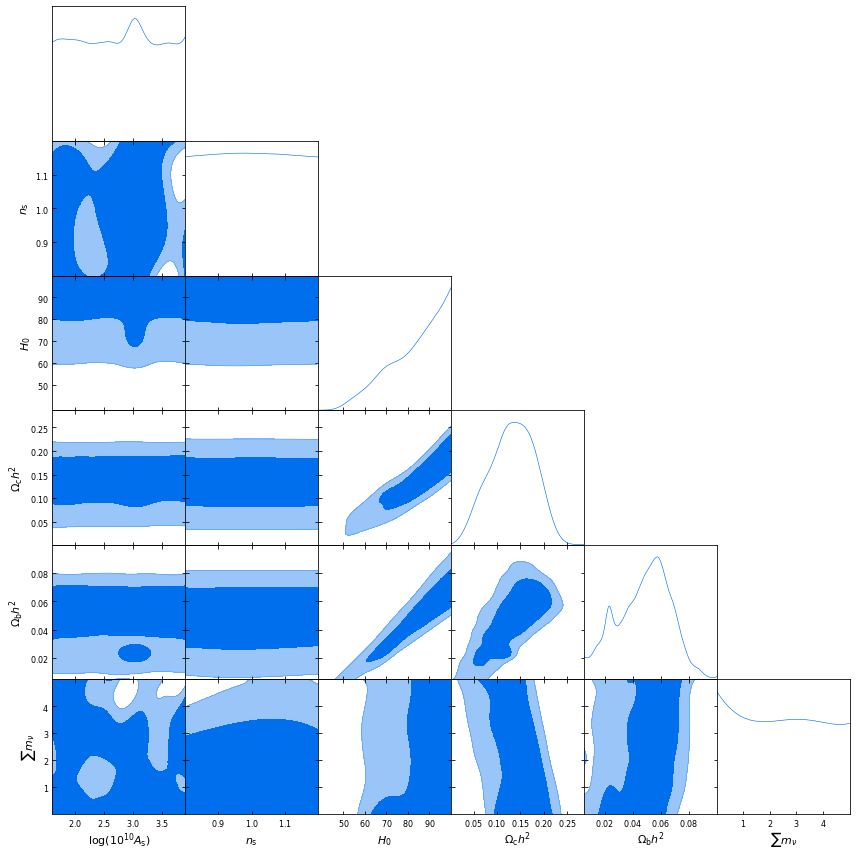

In [6]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples, ['logA','ns','H0','omch2', 'ombh2','mnu'],filled=True)

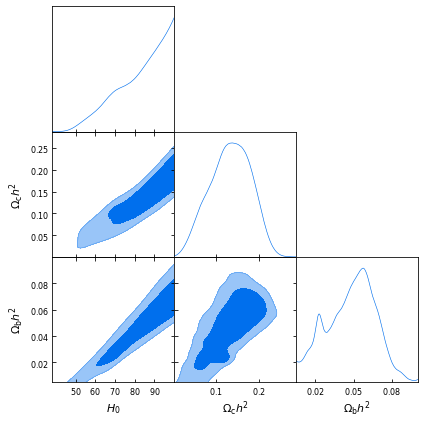

In [7]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples, ['H0','omch2', 'ombh2'],filled=True)

In [8]:
['10^9 As', 'ns', 'H0', 'w0', 'ombh2', 'omch2', 'nu_mass_ev']

['10^9 As', 'ns', 'H0', 'w0', 'ombh2', 'omch2', 'nu_mass_ev']

In [9]:
print(samples.paramNames)

logA	\log(10^{10} A_\mathrm{s})
ns	n_\mathrm{s}
H0	H_0
ombh2	\Omega_\mathrm{b} h^2
omch2	\Omega_\mathrm{c} h^2
mnu	\sum m_\nu
w	w_\mathrm{DE}
As*	10^{9} A_\mathrm{s}
omegam*	\Omega_\mathrm{m}
omegamh2*	\Omega_\mathrm{m} h^2
omega_de*	\Omega_\Lambda
YHe*	Y_\mathrm{P}
Y_p*	Y_P^\mathrm{BBN}
DHBBN*	10^5 \mathrm{D}/\mathrm{H}
chi2__BAO*	\chi^2_\mathrm{BAO}
chi2*	\chi^2
chi2__bao.desi_2024_bao_all*	\chi^2_\mathrm{bao.desi\ 2024\ bao\ all}



In [10]:
covmat = samples.getCov(pars=(7,1,2,6,3,4,5))

In [18]:
samples.getCov(pars=(3,4))

array([[0.00035135, 0.00057193],
       [0.00057193, 0.00225747]])

In [11]:
from getdist.gaussian_mixtures import GaussianND
covariance = covmat
mean = samples.mean(paramVec=[7,1,2,6,3,4,5])
gauss=GaussianND(mean, covariance, names=['As', 'ns', 'H0', 'w', 'ombh2', 'omch2', 'mnu'], label='Gaussian Mixture')

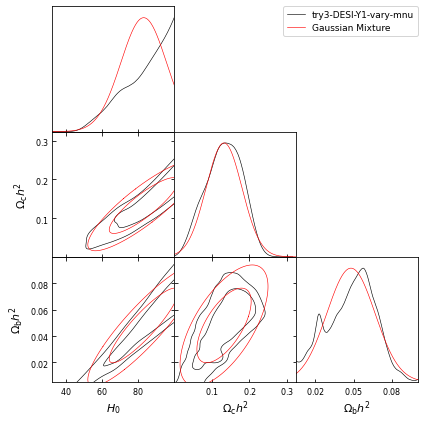

In [12]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples, gauss], ['H0','omch2', 'ombh2'],filled=False)

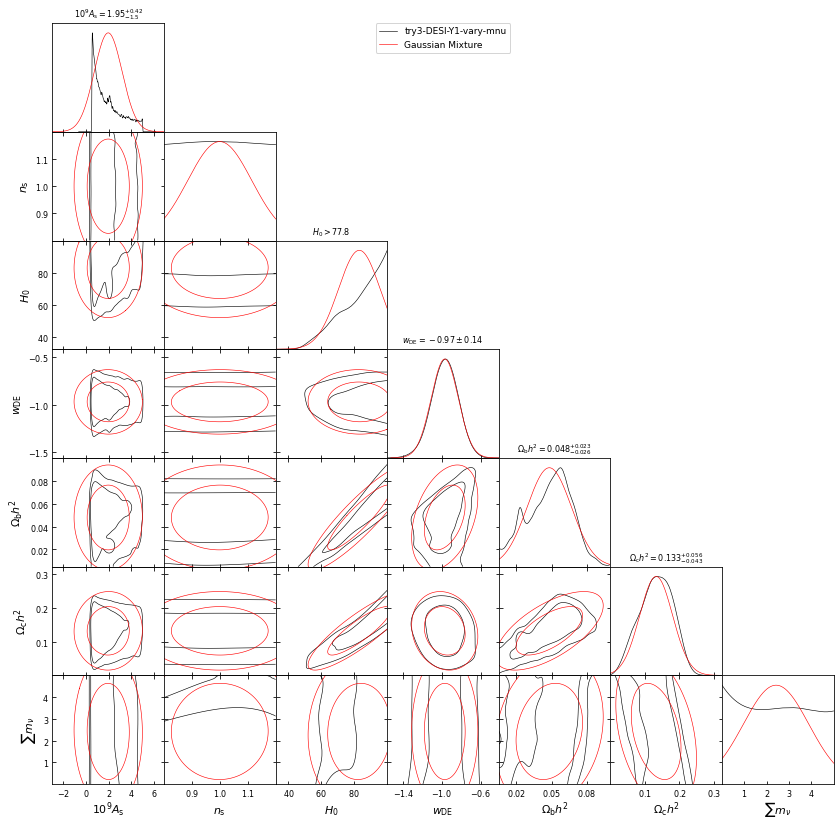

In [13]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples, gauss], 
                ['As', 'ns', 'H0', 'w', 'ombh2', 'omch2', 'mnu'],
                filled=False,
               title_limit=1)

In [14]:
samples.getTable(limit=1).tablePNG(filename='/home/users/delon/table.png')

'/home/users/delon/table.png'

In [15]:
import pickle
with open('DESI_y1_BAO_wnuCDM_cov.pkl', 'wb') as file:
    pickle.dump(covariance, file)

/tmp/ipykernel_8081/3940093247.py:3: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(covariance))


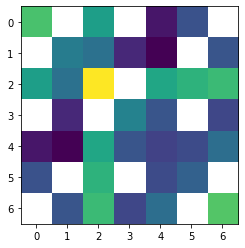

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.log(covariance))

In [17]:
covmat

array([[ 1.51223715e+00, -6.90296248e-06,  1.26580409e-01,
        -1.45260220e-03,  3.90738726e-05,  8.58311685e-04,
        -2.91242488e-02],
       [-6.90296248e-06,  1.32057384e-02,  5.99233387e-03,
         9.05009234e-05,  1.41862581e-05, -1.01021786e-05,
         1.05680413e-03],
       [ 1.26580409e-01,  5.99233387e-03,  1.61167866e+02,
        -3.03017130e-02,  2.12814059e-01,  5.22149833e-01,
         8.92907124e-01],
       [-1.45260220e-03,  9.05009234e-05, -3.03017130e-02,
         1.94320341e-02,  9.98121201e-04, -9.34039463e-04,
         4.63623450e-04],
       [ 3.90738726e-05,  1.41862581e-05,  2.12814059e-01,
         9.98121201e-04,  3.51352181e-04,  5.71926192e-04,
         5.09152639e-03],
       [ 8.58311685e-04, -1.01021786e-05,  5.22149833e-01,
        -9.34039463e-04,  5.71926192e-04,  2.25747038e-03,
        -2.38979239e-02],
       [-2.91242488e-02,  1.05680413e-03,  8.92907124e-01,
         4.63623450e-04,  5.09152639e-03, -2.38979239e-02,
         2.1468965